### 加载数据

In [1]:
from load_data_224 import batch_size, dataloaders, dataset_sizes, class_names

### 加载模型

In [2]:
from torchvision import models
from torch import nn

In [3]:
# 是否把模型的所有层冻结
# 设置模型参数的 requires_grad 属性
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            # 把模型的所有层的参数的 requires_grad 属性设置为 false，表示不再对原本的参数进行训练
            param.requires_grad = False

In [4]:
def initialize_resnet34(num_classes, feature_extract, use_pretrained=True):
    # pretrained 参数表示是否需要用预训练模型的参数来初始化
    # pretrained=True 返回在 ImageNet 数据集上训练好的模型
    model_ft = models.resnet34(pretrained=use_pretrained)
    # 是否冻结所有层，不进行训练
    set_parameter_requires_grad(model_ft, feature_extract)
    # 获取全连接层的输入数据个数
    num_ftrs = model_ft.fc.in_features
    # 重新设置全连接层，新设置的层的参数的 requires_grad 默认都是 True，所以整个模型就只有新设置的全连接层需要训练（更新梯度）
    model_ft.fc = nn.Sequential(nn.Linear(num_ftrs, num_classes),
                                nn.LogSoftmax(dim=1))
    input_size = 224


    return model_ft, input_size

In [5]:
# 训练任务的分类个数
num_classes = 3
# 是否冻结所有层，只训练全连接层
feature_extract = False
# 是否需要用预训练模型的参数来初始化
use_pretrained = True

model, input_size = initialize_resnet34(num_classes, feature_extract, use_pretrained)

model

a:\WorkApps\anaconda3\envs\deeplearning\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
a:\WorkApps\anaconda3\envs\deeplearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 优化器设置

In [6]:
import torch.optim as optim

In [7]:
# 优化器设置
optimizer = optim.Adam(model.parameters(), lr=1e-2)
# 学习率每10个epoch衰减成原来的1/10
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
# 最后一层已经LogSoftmax()了，所以不能nn.CrossEntropyLoss()来计算了
# nn.CrossEntropyLoss()相当于logSoftmax()和nn.NLLLoss()整合
criterion = nn.NLLLoss()

### 开始训练

In [8]:
from train_module import train_model

In [9]:
num_epochs = 30
# 模型保存地址
directory = 'checkpoint_resnet34_1_30'
filename = 'checkpoint.pth'

model_ft_1, train_history= train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs, directory, filename)

目录 'checkpoint_resnet34_1_30' 已存在。
CUDA is available!  Training on GPU ...
Epoch 0/29
----------
Time elapsed 2m 47s
train Loss: 0.7393 Acc: 0.7257
Time elapsed 3m 21s
valid Loss: 0.5318 Acc: 0.8207
Optimizer learning rate : 0.0100000
Epoch 1/29
----------
Time elapsed 5m 50s
train Loss: 0.4542 Acc: 0.8190
Time elapsed 6m 21s
valid Loss: 0.3058 Acc: 0.8975
Optimizer learning rate : 0.0100000
Epoch 2/29
----------
Time elapsed 8m 45s
train Loss: 0.3812 Acc: 0.8505
Time elapsed 9m 15s
valid Loss: 0.3377 Acc: 0.8719
Optimizer learning rate : 0.0100000
Epoch 3/29
----------
Time elapsed 11m 36s
train Loss: 0.3455 Acc: 0.8717
Time elapsed 12m 6s
valid Loss: 0.6517 Acc: 0.8339
Optimizer learning rate : 0.0100000
Epoch 4/29
----------
Time elapsed 14m 38s
train Loss: 0.3008 Acc: 0.8900
Time elapsed 15m 8s
valid Loss: 0.3894 Acc: 0.8703
Optimizer learning rate : 0.0100000
Epoch 5/29
----------
Time elapsed 17m 51s
train Loss: 0.2986 Acc: 0.8942
Time elapsed 18m 26s
valid Loss: 0.2675 Acc: 0.89

### 展示模型训练过程

val_acc_history: [array(0.82065217), array(0.89751553), array(0.87189441), array(0.83385093), array(0.87034161), array(0.89984472), array(0.8136646), array(0.9363354), array(0.88276398), array(0.92468944), array(0.94409938), array(0.95263975), array(0.94409938), array(0.94720497), array(0.93090062), array(0.94798137), array(0.95341615), array(0.94642857), array(0.95341615), array(0.94642857), array(0.95031056), array(0.95186335), array(0.95496894), array(0.95496894), array(0.95419255), array(0.95341615), array(0.95263975), array(0.95031056), array(0.95341615), array(0.95496894)]
train_acc_history: [array(0.72569984), array(0.81901244), array(0.85050544), array(0.87169518), array(0.8899689), array(0.89424572), array(0.90221617), array(0.90824261), array(0.91310264), array(0.92010109), array(0.93876361), array(0.94576205), array(0.9537325), array(0.95159409), array(0.9531493), array(0.95762053), array(0.96053655), array(0.96092535), array(0.96228616), array(0.96111975), array(0.96500778)

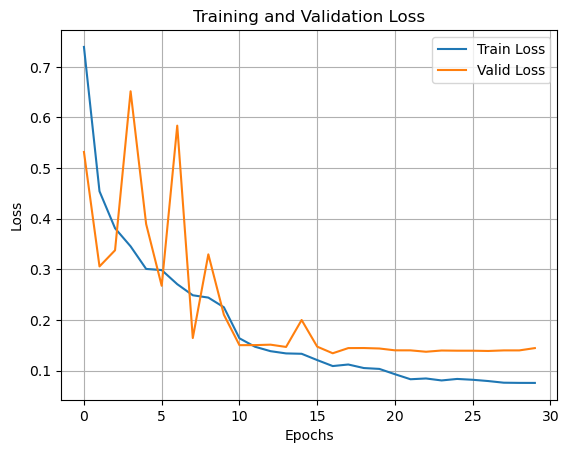

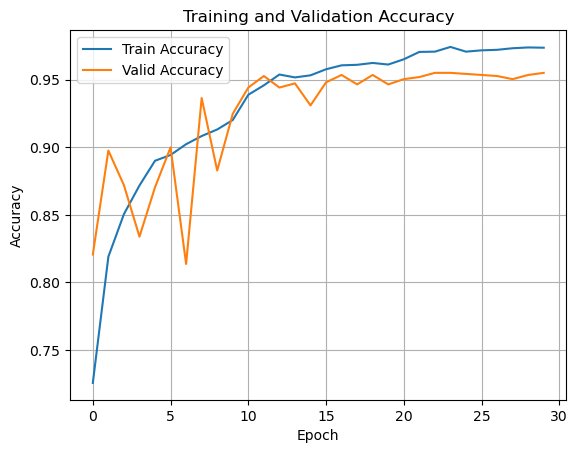

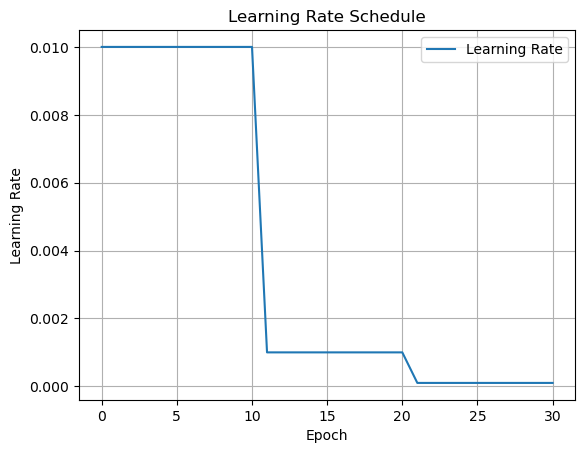

In [10]:
from utils import show_model_performace
import pickle

# 从文件中加载字典
history_filename = directory + '/train_history.pkl'
with open(history_filename, 'rb') as file:
    train_history = pickle.load(file)

# 打印加载的字典
for name, lst in train_history.items():
    print(f"{name}: {lst}")

show_model_performace(train_history, directory)

### 再次训练

加载模型

In [11]:
import torch

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
# 训练任务的分类个数
num_classes = 3
# 是否冻结所有层，只训练全连接层
feature_extract = False
# 是否需要用预训练模型的参数来初始化
use_pretrained = True

# 模型初始化
model_2, input_size = initialize_resnet34(num_classes, feature_extract, use_pretrained)

model_2.to(device)

a:\WorkApps\anaconda3\envs\deeplearning\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
a:\WorkApps\anaconda3\envs\deeplearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
# 优化器初始化
optimizer_2 = optim.Adam(model_2.parameters(), lr=1e-3)

criterion = nn.NLLLoss()

In [15]:
directory

'checkpoint_resnet34_1_30'

In [16]:
# Load the checkpoint
checkpoint = torch.load(directory + '/checkpoint.pth')
best_acc = checkpoint['best_acc']
print(best_acc)

# 将之前保存的模型参数加载到新的模型对象 model 中，以便在新的模型上继续训练或进行推断
model_2.load_state_dict(checkpoint['state_dict'])
# 将之前保存的优化器状态加载到新的优化器对象 optimizer 中，以便继续使用之前的优化器状态进行参数更新
optimizer_2.load_state_dict(checkpoint['optimizer'])
# 设置新优化器的学习率衰减策略
scheduler_2 = optim.lr_scheduler.StepLR(optimizer_2, step_size=10, gamma=0.5)

tensor(0.9550, device='cuda:0', dtype=torch.float64)


开始训练

In [17]:
num_epochs = 30
# 模型保存地址
directory = 'checkpoint_resnet34_2_30'
filename = 'checkpoint.pth'

model_2, train_history = train_model(model_2, dataloaders, criterion, optimizer_2, scheduler_2, num_epochs, directory, filename)

目录 'checkpoint_resnet34_2_30' 创建成功！
CUDA is available!  Training on GPU ...
Epoch 0/29
----------
Time elapsed 2m 52s
train Loss: 0.0809 Acc: 0.9699
Time elapsed 3m 26s
valid Loss: 0.1431 Acc: 0.9511
Optimizer learning rate : 0.0001000
Epoch 1/29
----------
Time elapsed 6m 18s
train Loss: 0.0836 Acc: 0.9705
Time elapsed 6m 54s
valid Loss: 0.1414 Acc: 0.9519
Optimizer learning rate : 0.0001000
Epoch 2/29
----------
Time elapsed 9m 44s
train Loss: 0.0816 Acc: 0.9699
Time elapsed 10m 13s
valid Loss: 0.1403 Acc: 0.9519
Optimizer learning rate : 0.0001000
Epoch 3/29
----------
Time elapsed 12m 48s
train Loss: 0.0791 Acc: 0.9710
Time elapsed 13m 23s
valid Loss: 0.1410 Acc: 0.9534
Optimizer learning rate : 0.0001000
Epoch 4/29
----------
Time elapsed 16m 15s
train Loss: 0.0816 Acc: 0.9734
Time elapsed 16m 49s
valid Loss: 0.1442 Acc: 0.9542
Optimizer learning rate : 0.0001000
Epoch 5/29
----------
Time elapsed 19m 43s
train Loss: 0.0787 Acc: 0.9732
Time elapsed 20m 18s
valid Loss: 0.1420 Acc: 

展示模型效果

val_acc_history: [array(0.95108696), array(0.95186335), array(0.95186335), array(0.95341615), array(0.95419255), array(0.95496894), array(0.95496894), array(0.95419255), array(0.95186335), array(0.95263975), array(0.95263975), array(0.95341615), array(0.95341615), array(0.95419255), array(0.95108696), array(0.95341615), array(0.95496894), array(0.95419255), array(0.95263975), array(0.95263975), array(0.95341615), array(0.95496894), array(0.95108696), array(0.95341615), array(0.95496894), array(0.95419255), array(0.95729814), array(0.95186335), array(0.95263975), array(0.95341615)]
train_acc_history: [array(0.96986781), array(0.97045101), array(0.96986781), array(0.97103421), array(0.97336703), array(0.97317263), array(0.97317263), array(0.97317263), array(0.97433904), array(0.97395023), array(0.97278383), array(0.97336703), array(0.97589425), array(0.97395023), array(0.97453344), array(0.97706065), array(0.97628305), array(0.97569984), array(0.97589425), array(0.97472784), array(0.9764

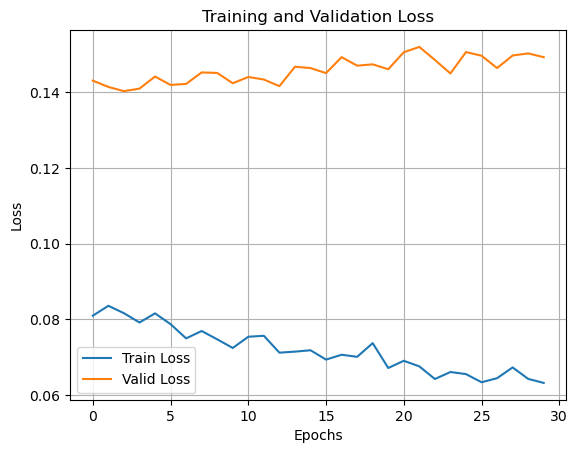

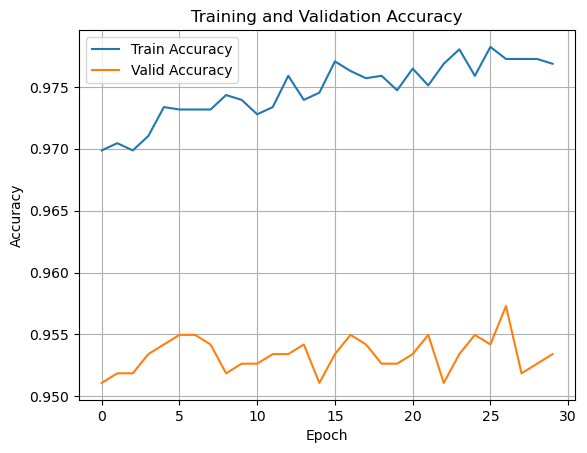

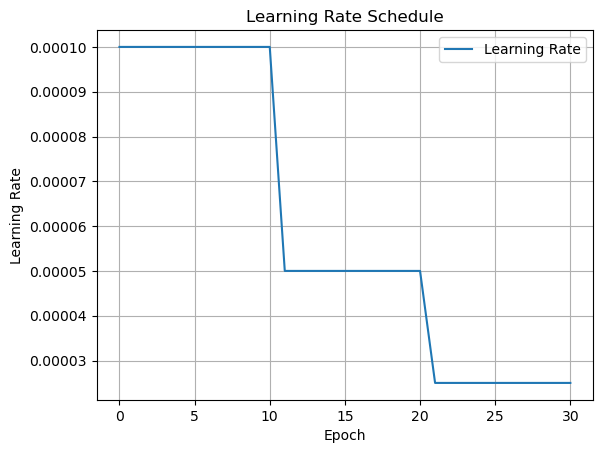

In [18]:
from utils import show_model_performace
import pickle

# 从文件中加载字典
history_filename = directory + '/train_history.pkl'
with open(history_filename, 'rb') as file:
    train_history = pickle.load(file)

# 打印加载的字典
for name, lst in train_history.items():
    print(f"{name}: {lst}")

show_model_performace(train_history, directory)